# Linear regression activity

The data on LEARN are measurements of the encoded response a neuron generates when a visual stimulus presented at different angles. The independent variable is the stimulus angle in radians and the dependent variable is sensory specific information in bits. The data was digitized from figure 1.B in [1].

In this activity, you will fit a ridge regression model to this data. As you will see in the data plot, the curve is non-linear, so a Gaussian basis function (kernel) will be used to generate the features for the regression.

There are 4 tasks for you to complete the example. Cells have clearly marked `# TODO` and `#####` comments for you to insert your code between.

1. Load and plot the complete dataset.
2. Finish the implementation for the Gaussian kernel class.
3. Fit the kernel ridge regression model with the scikit-learn package.
4. Plot the results of the model.

[1] D. A. Butts and M. S. Goldman, “Tuning curves, neuronal variability, and sensory coding,” PLoS Biology, vol. 4, no. 4, 2006. 

In [1]:
# TODO: Run this cell to import the relevant packages
import pickle  # Read/write serialized python objects to files
import numpy as np  # Numerical arrays
from sklearn.linear_model import Ridge  # Ridge regression model
from matplotlib import pyplot as plt  # Plotting and data visualization

# 1. Load and plot the data

In [2]:
# TODO: Change the filepath to point the regression activity data
filepath = "regression_activity_data.pkl"
#####

with open(filepath, "rb") as f:
    data = pickle.load(f)

x = data["angle"]
y = data["ssi"]

print(f"x is an array of shape {x.shape}")
print(f"y is an array of shape {y.shape}")

x is an array of shape (48,)
y is an array of shape (48,)


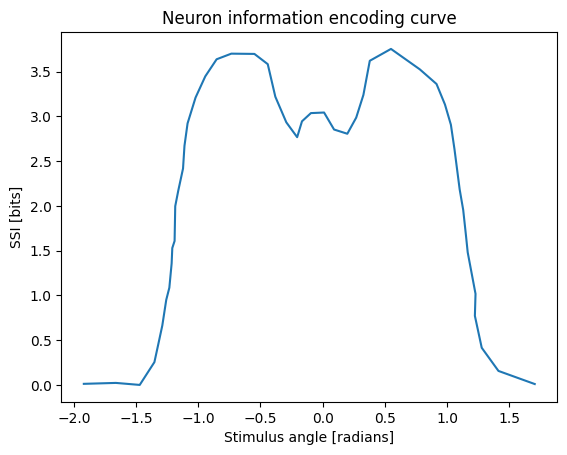

In [3]:
# TODO: Add a line to plot the data
plt.plot(x, y)
#####

plt.xlabel("Stimulus angle [radians]")
plt.ylabel("SSI [bits]")
plt.title("Neuron information encoding curve")
plt.show()

# 2. Finish the implementation of the Gaussian kernel class

The formula for the Gaussian function, given parameters $\mu$ and $\sigma$, is:

$$\phi(x | \mu, \sigma) = e^{-\frac{1}{2}(\frac{x - \mu}{\sigma})^2}$$

In [4]:
class Gaussian:
    def __init__(self, mu, sigma):
        """
        Class to represent the a Gaussian kernel for kernel ridge regression

        Example code:
            ```
            kernel = Gaussian(0, 1)
            ```

        :param mu: mean of the Gaussian
        :param sigma: standard deviation of the Gaussian
        """
        self.mu = mu
        self.sigma = sigma

    def __call__(self, x):
        """
        Override call function to compute Gaussian function of input values

        Example code:
            ```
            kernel = Gaussian(0, 1)
            y = kernel(x)
            ```

        :param x: array of input values for the kernel function
        :return: values of the kernel function evaluated at x
        """
        # TODO: Fill in the equation for the Gaussian function
        phi = np.exp(-(x-self.mu)**2/2/self.sigma**2)
        #####
        return phi

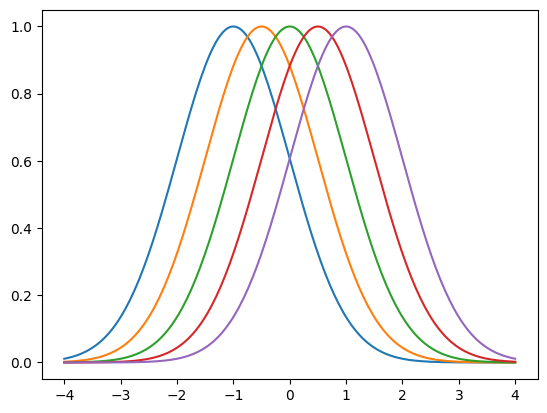

In [7]:
# TODO: Run this cell to check that your implementation works
width = 1
centres = np.linspace(-1, 1, 5)
basis_functions = [Gaussian(centre, width) for centre in centres]

x_plot = np.linspace(-4, 4, 200)

for kernel in basis_functions:
    y_plot = kernel(x_plot)
    plt.plot(x_plot, y_plot)
plt.show()

# 3. Train the kernel ridge regression model
For the ridge regression model, use regularization parameter $\alpha = 1 \times 10^{-2}$ and do not fit the intercept.

Use at least 20 basis functions with centers between -2 and 2. Examine the plot of the Gaussians and try plotting different widths. Compare to the curve we want to fit to select an appropriate width.

Relevant documentation:
- [scikit-learn Ridge documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [6]:
# TODO: Run this cell
def eval_basis_functions(x, basis_functions):
    """
    Function to compute the transformed features of the independent variable given a set of basis functions.
    If the input data, x, has n samples and there are k basis functions, the result, phi, will be of shape (n, k)

    :param x: a sample or samples of the independent variable, shape (n,)
    :param basis_functions: a list of k Gaussian basis functions
    :return: values of basis function evaluations at x, shape (n, k)
    """
    try:
        iter(x)
    except TypeError:
        x = [x]

    phi = np.zeros((len(x), len(basis_functions)))
    for i, basis_function in enumerate(basis_functions):
        phi[:, i] = basis_function(x)
    return phi

In [7]:
# TODO: Make a list of Gaussians to use as the basis functions
width = 0.2
centres = np.linspace(-2, 2, 20)
basis_functions = [Gaussian(centre, width) for centre in centres]

In [8]:
# TODO: Instantiate a ridge regression model based on the specification above
ridge = Ridge(alpha=1e-2, fit_intercept=False)
#####

In [9]:
# TODO: Fit the ridge model using ridge.fit(X, y), where X is the feature matrix generated from the basis functions and y is the dependent variable of our data
features = eval_basis_functions(x, basis_functions)
ridge.fit(features, y)

Ridge(alpha=0.01, fit_intercept=False)

# 4. Plot the results of the model

In [10]:
x_plot = np.linspace(-2, 2, 100)
# TODO: Evaluate the ridge model using ridge.predict(X). Use x_plot to generate the inputs to the predict function. The prediction outputs should be the same shape as x_plot
features_plot = eval_basis_functions(x_plot, basis_functions)
y_plot = ridge.predict(features_plot)
#####

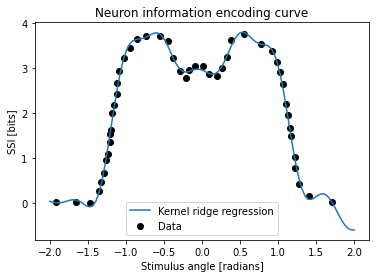

In [11]:
# TODO: Plot the model predictions, using the label "Kernel ridge regression"
plt.plot(x_plot, y_plot, label="Kernel ridge regression")
#####

plt.scatter(x, y, color="black", label="Data")
plt.xlabel("Stimulus angle [radians]")
plt.ylabel("SSI [bits]")
plt.title("Neuron information encoding curve")
plt.legend()
plt.show()